# Working with Django

We'll be working with the data from [my band's website](http://www.hallelujahthehills.com/), which uses the Django admin as a basic CMS. The source is on [GitHub](https://github.com/bhrutledge/jahhills.com).

Requirements:

```
$ brew install graphviz
(venv)$ pip install pydot graphviz
```

## What do our models look like?

Let's use some of IPython's magic to find out.

Thanks to [`manage.py shell_plus`](https://django-extensions.readthedocs.io/en/latest/shell_plus.html), all of our models have already been imported.

View the source code for a model:

In [1]:
Gig??

View the whole file:

In [2]:
from inspect import getfile

In [3]:
gig_file = getfile(Gig)
gig_file

'/Users/brian/Code/jahhills.com/hth/shows/models.py'

In [4]:
%pycat $gig_file

---

View the contents of the app directory:

In [5]:
from os import path

In [6]:
!ls -l {path.dirname(gig_file)}

total 72
-rw-r--r--   1 brian  staff     0 Aug 14  2014 __init__.py
-rw-r--r--   1 brian  staff   139 Nov  5 11:10 __init__.pyc
drwxr-xr-x  17 brian  staff   578 Mar 14 00:16 __pycache__
-rw-r--r--   1 brian  staff   599 Aug 11  2016 admin.py
-rw-r--r--   1 brian  staff  1326 Nov  5 11:10 admin.pyc
drwxr-xr-x  12 brian  staff   408 Aug 11  2016 migrations
-rw-r--r--   1 brian  staff  1801 Aug 11  2016 models.py
-rw-r--r--   1 brian  staff  3430 Nov  5 11:10 models.pyc
drwxr-xr-x   8 brian  staff   272 Aug 11  2016 tests
-rw-r--r--   1 brian  staff   151 Feb 14  2016 urls.py
-rw-r--r--   1 brian  staff   355 Nov  5 11:10 urls.pyc
-rw-r--r--   1 brian  staff   201 Feb 14  2016 views.py
-rw-r--r--   1 brian  staff   592 Nov  5 11:10 views.pyc


---

View the output of the [`graph_models`](https://django-extensions.readthedocs.io/en/latest/graph_models.html) command from Django Extensions:

In [7]:
from graphviz import Source
from IPython.display import Image

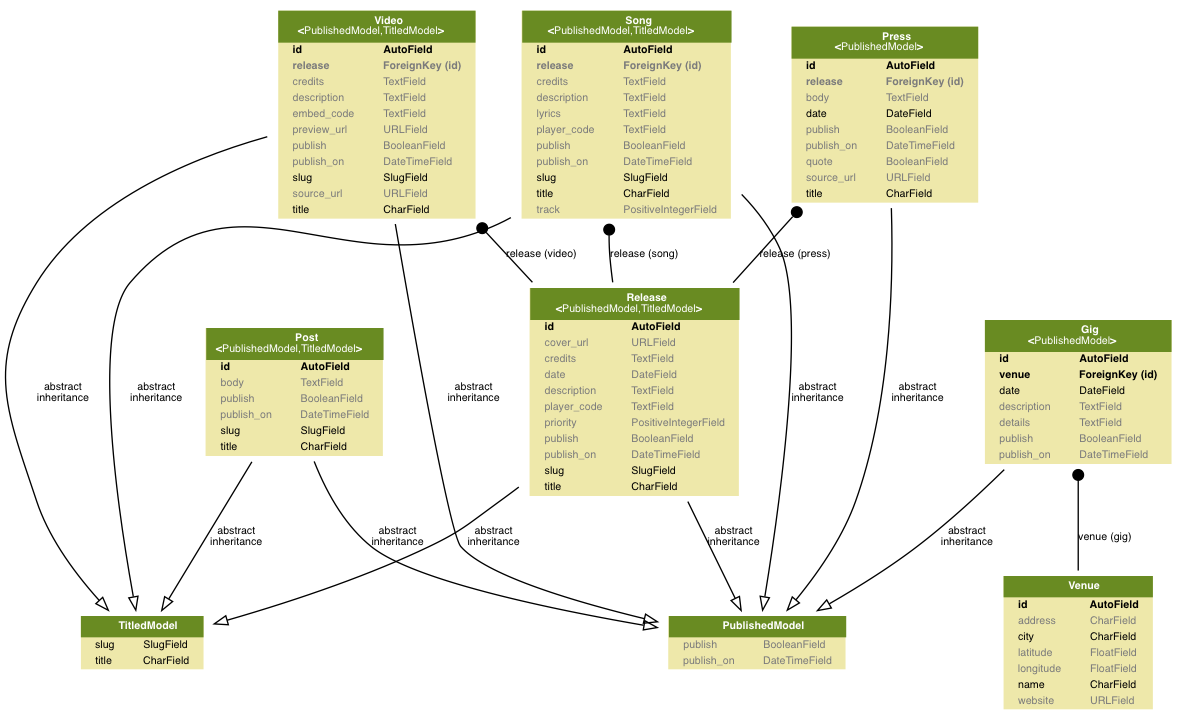

In [8]:
!manage.py graph_models music news shows -o models.png  2>/dev/null
Image('models.png')

Alternatively, capture the output, and render it as SVG:

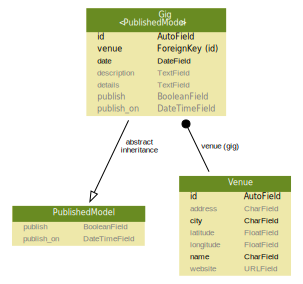

In [9]:
dot = !manage.py graph_models shows 2>/dev/null
Source(dot.n)

---

Learn more about IPython's magic functions:

In [10]:
%quickref

---

## Answering questions

### How often do we play gigs?

In [11]:
gigs = Gig.objects.published().past()
gigs.count()

269

### Where did we play last year?

In [12]:
[gig for gig in gigs.filter(date__year='2016')]

[<Gig: 2016-12-16, Great Scott, Allston, MA>,
 <Gig: 2016-09-25, Brighton Music Hall, Allston, MA>,
 <Gig: 2016-09-10, Pinebanks Field, Jamaica Plain, MA>,
 <Gig: 2016-08-07, State Park, Cambridge, MA>,
 <Gig: 2016-08-06, Fuzz Hut, Manchester, NH>,
 <Gig: 2016-08-05, Chesterfest, Stockbridge, MA>,
 <Gig: 2016-07-30, Dusk, Providence, RI>,
 <Gig: 2016-07-29, Cake Shop, New York, NY>,
 <Gig: 2016-07-28, Club 603, Baltimore, MD>,
 <Gig: 2016-07-27, Black Cat, Washington, DC>,
 <Gig: 2016-07-09, Grumpy's, Falmouth, MA>,
 <Gig: 2016-07-08, The Sinclair, Cambridge, MA>,
 <Gig: 2016-05-14, C'Mon Everybody, Brooklyn, NY>,
 <Gig: 2016-05-12, Great Scott, Allston, MA>,
 <Gig: 2016-03-12, The Bowery Electric, New York, NY>,
 <Gig: 2016-01-31, Great Scott, Allston, MA>]

### How many gigs have we played each year?

In [13]:
for date in gigs.dates('date', 'year'):
    gig_count = gigs.filter(date__year=date.year).count()
    print('{}: {}'.format(date.year, gig_count))

2005: 2
2006: 17
2007: 41
2008: 40
2009: 50
2010: 20
2011: 8
2012: 25
2013: 15
2014: 21
2015: 13
2016: 16
2017: 1


### What venues have we played?

In [14]:
gigs.values('venue').distinct().aggregate(count=Count('*'))

{'count': 171}

Render a Django template in the notebook:

In [15]:
from django.template import Context, Template
from IPython.display import HTML

In [16]:
top_venues = (
    gigs.values('venue__name', 'venue__city')
    .annotate(gig__count=Count('*'))
    .order_by('-gig__count')
    [:10]
)

template = Template("""
<table>
    <tr>
        <th>Venue</th>
        <th>City</th>
        <th>Gigs</th>
    </tr>
    {% for v in venues %}
    <tr>
        <td>{{v.venue__name}}</td>
        <td>{{v.venue__city}}</td>
        <td>{{v.gig__count}}</td>
    </tr>
    {% endfor %}
</table>
""")

context = Context(
    {'venues': top_venues}
)

HTML(template.render(context))

Venue,City,Gigs
Great Scott,"Allston, MA",25
TT The Bear's Place,"Cambridge, MA",11
The Middle East Upstairs,"Cambridge, MA",8
The Middle East Downstairs,"Cambridge, MA",7
The Mercury Lounge,"New York, NY",5
The Sinclair,"Cambridge, MA",5
Cake Shop,"New York, NY",4
Garfield Art Works,"Pittsburgh, PA",3
Ralph's Diner,"Worcester, MA",3
The Beachland Tavern,"Cleveland, OH",3
